In [1]:
#Importing the required datasets
import numpy as np,pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from pprint import pprint
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
#Importing/Reading the file
train=pd.read_csv('train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
train.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      32.368090
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     32.368090
18     31.000000
19     35.898148
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     32.368090
27     19.000000
28     21.773973
29     32.368090
         ...    
861    21.000000
862    48.000000
863    21.773973
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    32.368090
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    32.368090
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    21.7739

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train["Salut"]=train.Name.apply(lambda x: x.split(',')[-1].split('.')[0].split(' ')[-1])
train.Salut.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [14]:
train_dict=train.groupby(["Salut"]).Age.mean()
pprint(train_dict)
train['Age']=train.apply(lambda row:train_dict[row["Salut"]] if np.isnan(row["Age"]) else row["Age"], axis = 1)

Salut
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64


In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train.Sex.unique()

array([1, 0], dtype=int64)

In [17]:
train.Sex=train.Sex.replace(['male','female'],[1,0])

In [21]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
train.Embarked=train.Embarked.replace(['S','C','Q'],[1,2,3])

In [20]:
train.Embarked=train.Embarked.replace(np.nan,'S')

[(10, 0.8444444444444444),
 (11, 0.8444444444444444),
 (12, 0.8888888888888888),
 (13, 0.8666666666666667),
 (14, 0.8666666666666667),
 (15, 0.8666666666666667),
 (16, 0.8888888888888888),
 (17, 0.8666666666666667),
 (18, 0.8666666666666667),
 (19, 0.8444444444444444),
 (20, 0.8444444444444444),
 (21, 0.8888888888888888),
 (22, 0.8666666666666667),
 (23, 0.8888888888888888),
 (24, 0.8444444444444444),
 (25, 0.8666666666666667),
 (26, 0.8666666666666667),
 (27, 0.8666666666666667),
 (28, 0.8666666666666667),
 (29, 0.8666666666666667),
 (30, 0.8888888888888888),
 (31, 0.8666666666666667),
 (32, 0.8444444444444444),
 (33, 0.8444444444444444),
 (34, 0.8666666666666667),
 (35, 0.8666666666666667),
 (36, 0.8444444444444444),
 (37, 0.8222222222222222),
 (38, 0.8888888888888888),
 (39, 0.8444444444444444),
 (40, 0.8888888888888888),
 (41, 0.8444444444444444),
 (42, 0.8888888888888888),
 (43, 0.8444444444444444),
 (44, 0.8888888888888888),
 (45, 0.8888888888888888),
 (46, 0.8666666666666667),
 

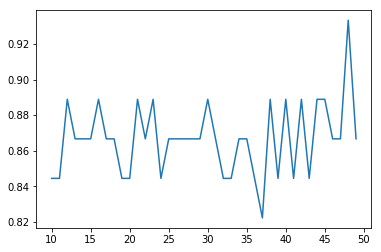

In [24]:
X=train.drop(['Survived','Name','Ticket','Salut'],axis=1)
Y=train.Survived
max_depth=range(10,50)
scores=[]
for i in max_depth:
    X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.05,random_state=24)
    forest=RandomForestClassifier(max_depth=i,max_leaf_nodes=10,min_samples_leaf=5,criterion='gini')
    forest.fit(X_train,Y_train)
    scores.append(forest.score(X_test,Y_test))
S=list(zip(max_depth,scores))
pprint(S)
plt.plot(max_depth,scores)
print(max(scores))

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest

In [26]:
datamatrix=xgb.DMatrix(data=X,label=Y)

In [50]:
steps=[#('knn',KNeighborsClassifier()),
       #('dtc',DecisionTreeClassifier()),
       ('xgbclf',xgb.XGBRegressor())]
#        ('rf',RandomForestClassifier()),
#        ('scf',SVC())]

In [51]:
print(KNeighborsClassifier())
print(DecisionTreeClassifier())
print(xgb.XGBRegressor())
print(RandomForestClassifier())
print(SVC())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, 

In [53]:
param_grid=[{'knn__n_neighbors':[3,4,5],
            'dtc__criterion':['gini','entropy'],'dtc__max_leaf_nodes':np.arange(5,25),
            'xgbclf__max_depth':np.arange(5,25),'xgbclf__learning_rate':[0.001,0.01,0.1,0.2,0.3,0.4,0.5],'xgbclf__n_estimators':np.arange(10,30),
            'rf__max_leaf_nodes':np.arange(5,25),'rf__max_depth':np.arange(5,25)}]

In [54]:
for i in np.arange(0,len(param_grid)):
    print(param_grid[i])

{'dtc__criterion': ['gini', 'entropy'], 'dtc__max_leaf_nodes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])}


In [60]:
for i in steps:
    pip_steps=[i]
    print(pip_steps)
    pipeline=Pipeline(pip_steps)
#     print(pipeline)
    estimator = GridSearchCV(pipeline, param_grid[:] ,cv =4, verbose=1, scoring="neg_mean_squared_error")
    print(type(estimator))
    estimator.fit(X,Y)
    print(estimator.best_params_)
    print(np.sqrt(-1*estimator.best_score_))

[('dtc', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]
<class 'sklearn.model_selection._search.GridSearchCV'>
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'dtc__criterion': 'gini', 'dtc__max_leaf_nodes': 6}
0.42902546629485455


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.6s finished


In [ ]:
print(estimator.get_params().keys())